<a href="https://colab.research.google.com/github/ThiagoZarur/Simulador-MonteCarlo-BTC/blob/master/simuladorMontecarlo_retornos_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar libreria ccxt para descargar datos historicos de BTC
!pip install ccxt

In [ ]:
#Libreria pandas_montecarlo para poder realizar la simulacion 
! pip install pandas_montecarlo --upgrade --no-cache-dir

In [4]:
#importar las librerias que usaremos
from pandas_datareader import data
import pandas_montecarlo
import pandas as pd
from datetime import datetime
import time
import ccxt 

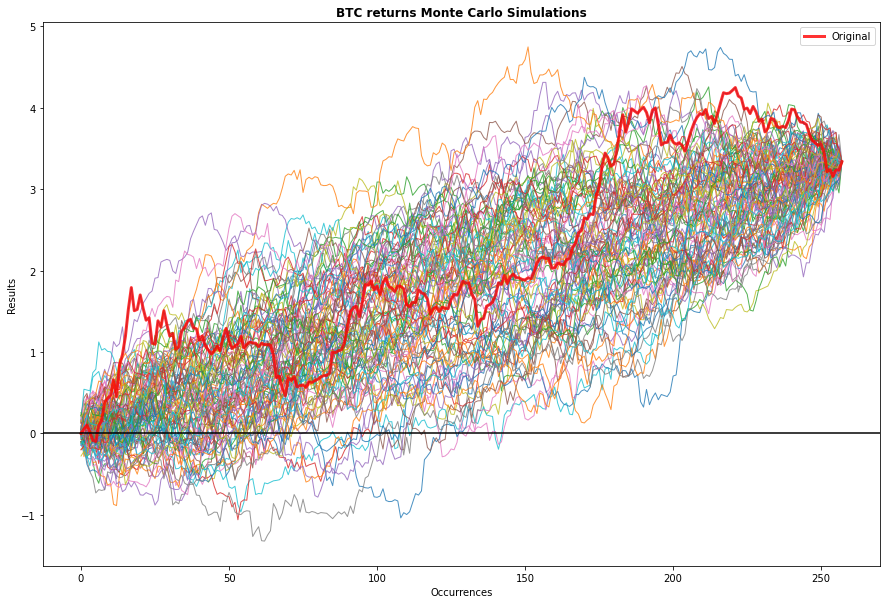

In [16]:
#Funcion que llama datos historicos de bitcoin y realizamos la simulacion en temporalidad mensual con 100 simulaciones
def ccxt_ohlcv_to_dataframe(ohlcv):

    df = pd.DataFrame(ohlcv)
    df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    df['date'] = pd.to_datetime(df['time'] * 1000000, infer_datetime_format=True)

    return df

exchange = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '1w'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
df = ccxt_ohlcv_to_dataframe(ohlcv)
df['return'] = df['close'].pct_change().fillna(0)
mc = df['return'].montecarlo(sims=100, bust=-0.1, goal=0.5) #bust/max dd es de -0.1 (-10%) y goal de 0.5 (50%) 

mc.plot(title='BTC returns Monte Carlo Simulations weekly',figsize=(15,10))

In [6]:
#Estadisticas de la simulacion
mc.stats

{'bust': 0.6,
 'goal': 0.4,
 'max': 3.197735925083886,
 'maxdd': -1.226393751815669,
 'mean': 3.1977359250838835,
 'median': 3.197735925083884,
 'min': 3.197735925083882,
 'std': 8.892991500130843e-16}

In [7]:
#Estadisticas con el maximo drawdown
mc.maxdd

{'max': -0.002363093123512572,
 'mean': -0.3218210565420609,
 'median': -0.261389341623485,
 'min': -1.226393751815669,
 'std': 0.2730123657786083}

In [ ]:
mc.data.head(10)

,original,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.004051,-0.167688,0.363904,-0.054861,0.122004,-0.073310,0.476073,0.054456,0.398769,...,-0.048912,0.102723,-0.372907,0.279718,0.096087,-0.074932,-0.017812,0.268743,0.468512,-0.072592
1,-0.073310,-0.048912,-0.329518,-0.048912,0.279718,0.363904,-0.188473,-0.088666,0.476073,0.110536,...,-0.054861,0.476073,-0.054861,0.000000,-0.088666,-0.070950,0.240400,0.209835,0.110536,-0.167688
2,0.476073,-0.154920,-0.190461,0.268743,0.163628,-0.083740,-0.070950,-0.083740,-0.365762,0.344681,...,0.296509,-0.093096,0.301422,-0.072592,0.607838,0.209835,0.468512,0.428168,0.096087,-0.083740
3,0.522352,0.476073,-0.250158,0.004051,0.468512,-0.365762,0.209835,0.240400,-0.048912,-0.054861,...,-0.372907,-0.059291,-0.069570,0.136006,-0.073310,0.144150,0.394086,-0.135399,0.522352,0.240400
4,0.394086,0.136006,-0.135399,-0.074932,0.363904,0.240400,0.268743,0.299874,-0.045965,-0.059291,...,0.102723,-0.146284,-0.048912,-0.174925,-0.372907,-0.017812,-0.154920,-0.146284,0.279718,-0.045965
5,-0.250158,0.363904,0.607838,0.144150,-0.154920,0.398769,-0.048912,-0.045965,-0.017812,-0.032781,...,0.468512,0.268743,-0.017812,-0.048912,0.054456,0.301422,0.279718,-0.372907,-0.083740,0.163628
6,0.004051,0.054456,-0.093096,-0.250158,0.344681,-0.135399,-0.017812,-0.190461,0.027705,-0.083740,...,-0.146284,-0.054861,0.163628,0.240400,0.209835,0.428168,-0.032781,-0.069570,-0.365762,0.027705
7,-0.329518,-0.070950,0.163628,-0.069570,-0.365762,-0.167688,-0.083740,0.027705,0.398769,0.076110,...,0.428168,-0.069570,0.096087,0.468512,-0.250158,-0.190461,0.344681,0.522352,-0.054861,0.428168
8,0.335374,-0.073310,-0.083740,0.607838,0.054456,0.299874,-0.146284,-0.354289,-0.032781,0.468512,...,-0.074932,-0.247920,0.004051,0.102723,-0.048912,-0.073310,-0.038427,0.163628,-0.146284,-0.146284
9,-0.190461,-0.059291,0.122004,0.096087,-0.059291,0.522352,0.144150,-0.072592,-0.070950,-0.247920,...,-0.045965,-0.365762,0.363904,0.027705,0.344681,-0.354289,-0.167688,-0.045965,0.183103,-0.093096
